In [ ]:
"""Prediction using Supervised ML 
(Level - Beginner)
Task1:- 
    Graduate Rotational Internship (GRIP), The Sparks Foundation, Batch-GRIPAPRIL23 

Problem Statement-

● Predict the percentage of an student based on the no. of study hours. 
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool 
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day? 

The task can be solved using Simple Linear Regression on the given dataset.

Author
Disha"""

In [3]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#importing data from an external link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Exploring the Dataset

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.mode()

,Hours,Scores
0,2.5,30.0
1,2.7,NaN


In [ ]:
"""Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually 
find any relationship between the data.
We can create the plot with the following script:"""

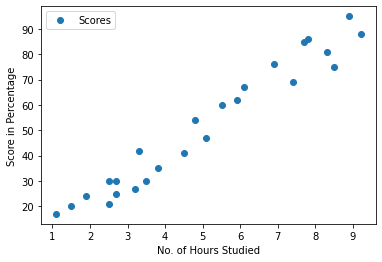

In [7]:
data.plot(x="Hours",y="Scores",style='o')
plt.xlabel("No. of Hours Studied")
plt.ylabel("Score in Percentage")
plt.show()

In [ ]:
"""The scatter plot shows us that there exists a positive linear relationship between the data values 
i.e the scores and the number of hours studied."""

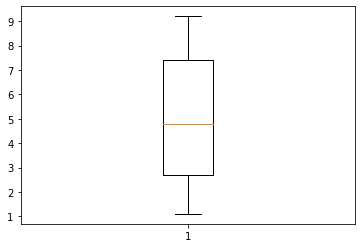

In [8]:
plt.boxplot(x=data['Hours'])
plt.show()

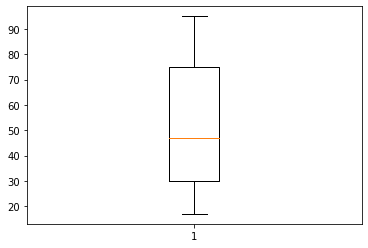

In [9]:
plt.boxplot(x=data['Scores'])
plt.show()

In [ ]:
"""The first boxplot shows that most of the data in the hours column is found within the range 2.5-7.5. 
The second boxplot shows that most of the data in the scores column is found within the range 30-75. 
The data outside the specified ranges form outliers."""



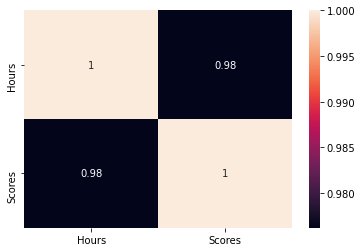

In [10]:
annot=True
hm=sns.heatmap(data=data.corr(),annot=annot)
plt.show()

In [ ]:
"""From the graph above, 
we can clearly see that there is a positive linear relation between
the number of hours studied and percentage of score."""

In [ ]:
"""Preparing the data....
The next step is to divide the data into "attributes" (inputs) and 
"labels" (outputs)."""

In [11]:
X=data.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
Y=data.iloc[:,1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [ ]:
"""Now that we have our attributes and labels, 
the next step is to split this data into training and test sets.
We'll do this by using Scikit-Learn's built-in train_test_split() method:"""

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [15]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [ ]:
"""Training the Algorithm....
We have split our data into training and testing sets,
and now is finally the time to train our algorithm. """

In [27]:
model=LinearRegression()
model.fit(X_train,Y_train)
print("Training completed.")

Training completed.


In [29]:
r_square=model.score(X_train,Y_train)
print(f"Co-efficient of determination:{r_square}")

Co-efficient of determination:0.9515510725211552


In [18]:
print(f"Intercept:{model.intercept_}") 
print(f"Slope:{model.coef_}")        

Intercept:2.018160041434683
Slope:[9.91065648]


In [ ]:
""" Plotting the regression line
Plotting for the test data"""

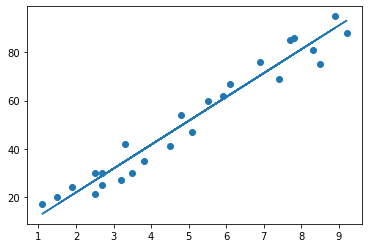

In [19]:
line=model.coef_*X+model.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [ ]:
"""Making Predictions....
Now that we have trained our algorithm, 
it's time to make some predictions."""

In [20]:
predict_y=model.predict(X_test)
print(predict_y)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [21]:
df=pd.DataFrame({'Actual Score':Y_test,'Predicted Score':predict_y})
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
"""Evaluating the model....

The final step is to evaluate the performance of algorithm. 
This step is particularly important to compare how well different 
algorithms perform on a particular dataset. 
For simplicity here, we have chosen the mean square error. 
There are many such metrics."""

In [22]:
errors=list()
for i in range(len(Y_test)):
    err=abs((df['Actual Score'][i]-df['Predicted Score'][i]))
    errors.append(err)
print(f"Errors on comparing Actual and the Predicted scores:\n{errors}")

Errors on comparing Actual and the Predicted scores:
[3.115855237601963, 6.732260779489842, 6.3570179981872315, 3.2051987569597244, 1.5089667227761154]


In [23]:
from sklearn import metrics
error=metrics.mean_absolute_error(Y_test,predict_y)
print(error)

4.183859899002975


In [ ]:
"""Next, we plot the predicted scores and 
the actual scores of the training set to get a visual idea of the deviation 
from original ones."""

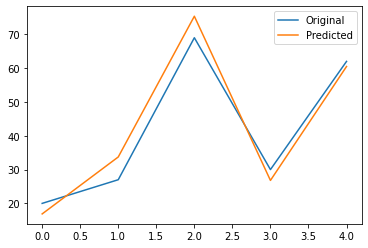

In [24]:
plt.plot(Y_test,label='Original')
plt.plot(predict_y,label='Predicted')
plt.legend()
plt.show()

In [25]:
hours=9.25
score_new_pred=model.predict([[hours]])
print(f"Predicted Score if the student studies for 9.25 hours:{score_new_pred}")

Predicted Score if the student studies for 9.25 hours:[93.69173249]


In [ ]:
"""Now, we take an user input and predict the score based on it 
using our model."""

In [26]:
hrs= float(input("Enter number of hours studied per day:"))
if (hrs<=24):
    
    pred_score=model.predict([[hrs]])
    print("Predicted Score:")
    print(pred_score)
else:
    print("Please enter valid number of hours")

Enter number of hours studied per day:8
Predicted Score:
[81.30341189]
